Plot Accuracy

[INFO] 已載入 2501 個閾值與平均準確率數據。
[INFO] 趨勢圖已保存至: rag_for_tcfd_reports/data/accuracy_result\accuracy_vs_threshold.png


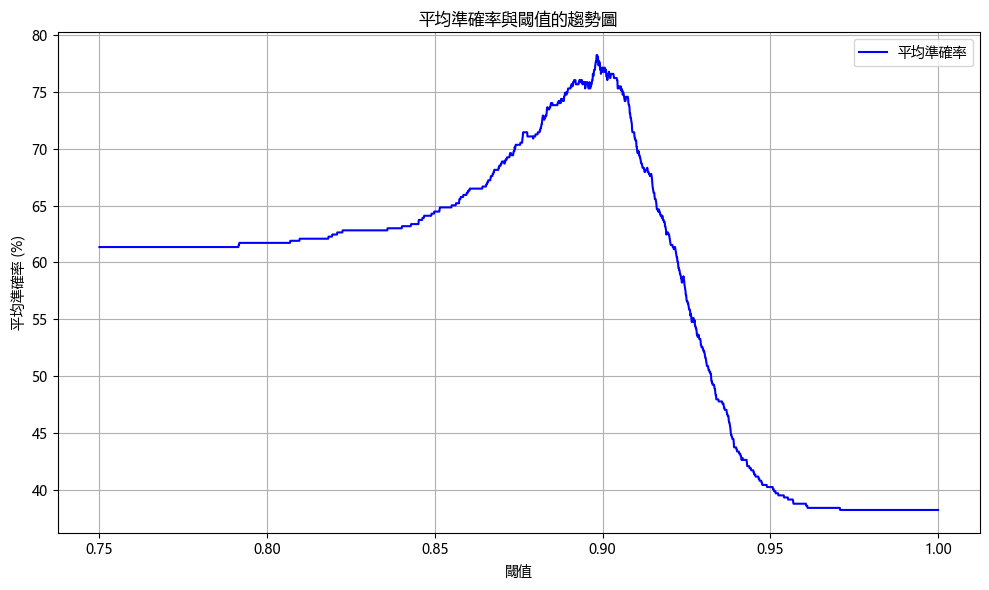

In [1]:
# plot_accuracy.ipynb

import os
import pandas as pd
import matplotlib.pyplot as plt

# 設置支持 CJK 字符的字型
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 可以根據需要更換為其他支持 CJK 的字型，如 'SimHei', 'Noto Sans CJK'
plt.rcParams['axes.unicode_minus'] = False  # 正確顯示負號

def load_threshold_accuracy(csv_path):
    """
    載入閾值與平均準確率的數據。
    """
    if not os.path.exists(csv_path):
        print(f"[ERROR] 數據文件不存在: {csv_path}")
        return None, None
    
    df = pd.read_csv(csv_path)
    thresholds = df['threshold'].tolist()
    accuracies = df['average_accuracy'].tolist()
    return thresholds, accuracies

def plot_accuracy(thresholds, accuracies, save_path=None):
    """
    繪製閾值與平均準確率的趨勢圖。
    """
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, [acc * 100 for acc in accuracies], label='平均準確率', color='blue')
    plt.xlabel('閾值')
    plt.ylabel('平均準確率 (%)')
    plt.title('平均準確率與閾值的趨勢圖')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
        print(f"[INFO] 趨勢圖已保存至: {save_path}")
    plt.show()

# 定義數據文件路徑
accuracy_result_base = "rag_for_tcfd_reports/data/accuracy_result"
csv_filename = "thresholds_accuracy.csv"
csv_path = os.path.join(accuracy_result_base, csv_filename)

# 定義保存圖表的路徑（可選）
plot_path = os.path.join(accuracy_result_base, "accuracy_vs_threshold.png")

# 載入數據
thresholds, accuracies = load_threshold_accuracy(csv_path)
if thresholds is not None and accuracies is not None:
    print(f"[INFO] 已載入 {len(thresholds)} 個閾值與平均準確率數據。")

    # 繪製趨勢圖
    plot_accuracy(thresholds, accuracies, save_path=plot_path)
